## Python: Working with Predictive Analytics
Prediction of Healthcare Costs by Insurance Companies

In [1]:
#Importing Python Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/ritik/Desktop/LinkedInLearning/PredictiveModelingInPython/Ex_Files_Python_Predictive_Analytics/Exercise Files/Datasets/insurance.csv")
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#Handling Missing values

#checking how many values are missing(NaN) columnwise
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

bmi    5
dtype: int64


In [4]:
#filling the missing values with mean of the column - option-1:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [5]:
#option2 for dropping the entire column

# reloading fresh dataset for option 0
data = pd.read_csv("C:/Users/ritik/Desktop/LinkedInLearning/PredictiveModelingInPython/Ex_Files_Python_Predictive_Analytics/Exercise Files/Datasets/insurance.csv")

data.drop('bmi', axis = 1, inplace = True)
#check how many values are missing (NaN) - after we dropped 'bmi'
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [6]:
#option3 for dropping NAN

# reloading fresh dataset for option 1
data = pd.read_csv("C:/Users/ritik/Desktop/LinkedInLearning/PredictiveModelingInPython/Ex_Files_Python_Predictive_Analytics/Exercise Files/Datasets/insurance.csv")

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [7]:
#filling the missing values using SimpleImputer- option-3:
# reloading fresh dataset
data = pd.read_csv("C:/Users/ritik/Desktop/LinkedInLearning/PredictiveModelingInPython/Ex_Files_Python_Predictive_Analytics/Exercise Files/Datasets/insurance.csv")

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(data['bmi'].values.reshape(-1,1))
data['bmi'] = imputer.transform(data['bmi'].values.reshape(-1,1))

#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


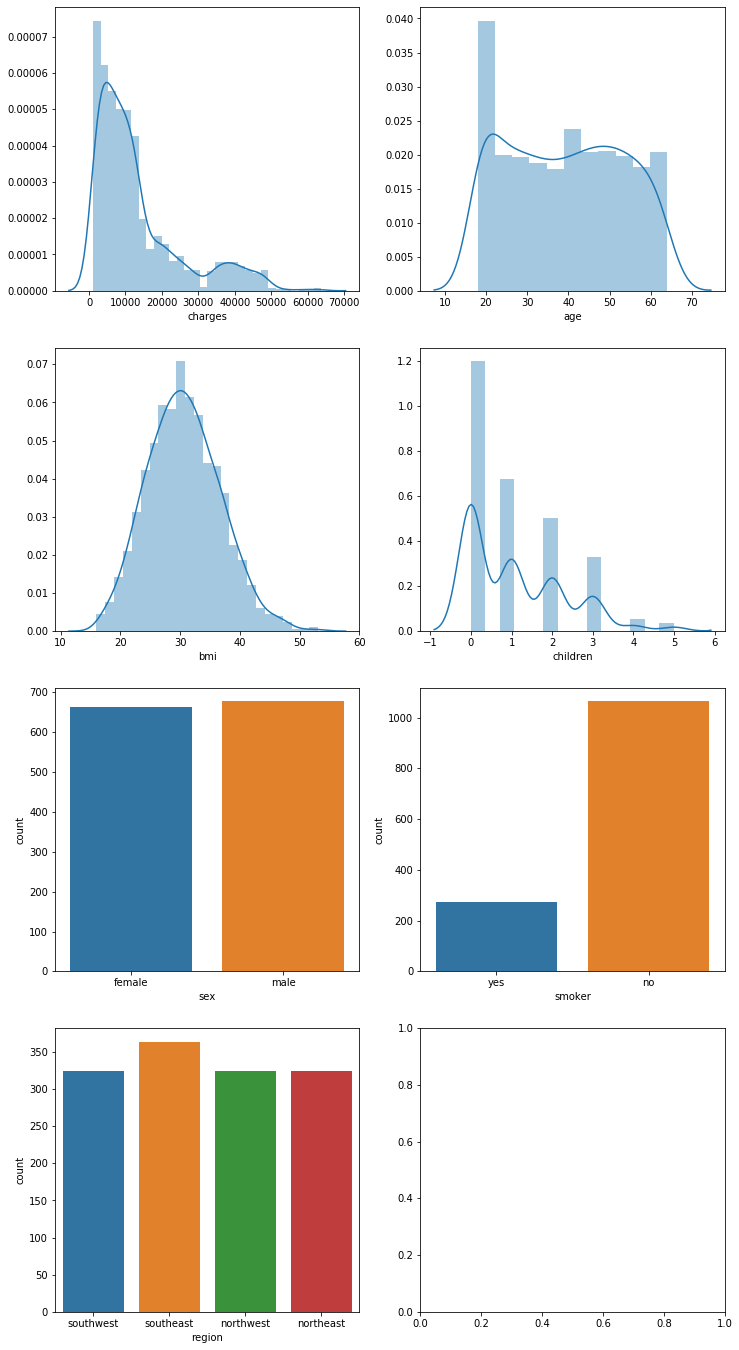

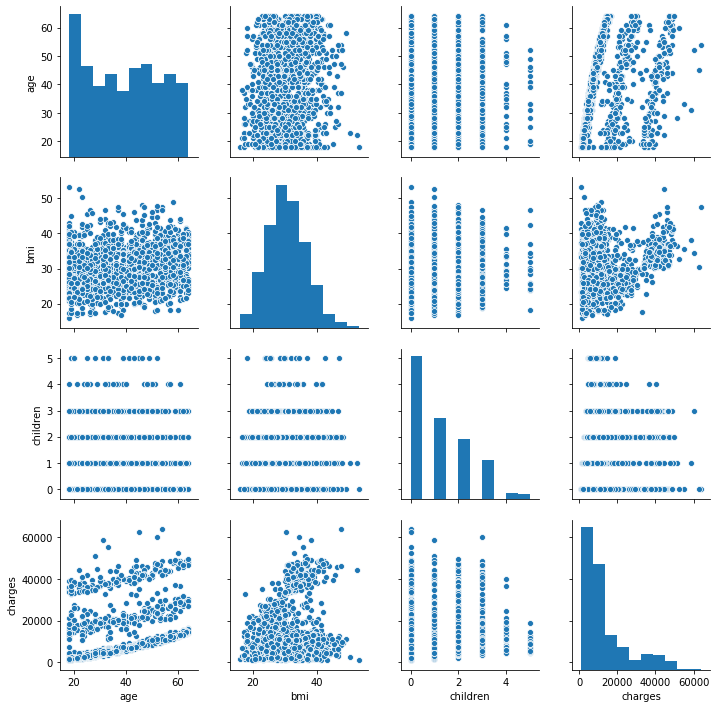

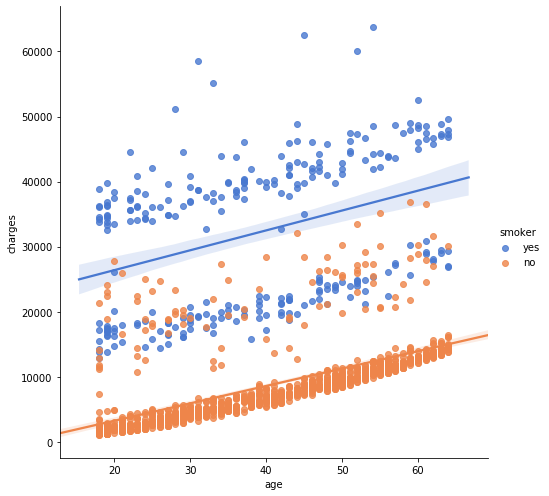

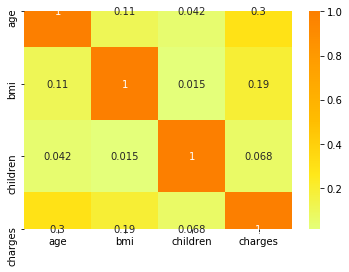

In [8]:
#Visualization

figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])


#visualizeing skewness
sns.pairplot(data)

#the pair plot shows some relation between age and charges
#So, lets look at smokers vs non-smokers on age vs charges:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 7)
plt.show(sns)

#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

In [9]:
#Python libraries for converting categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#sklearn label encoding: maps each category to a different integer
#create ndarray for label encodoing (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le


## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])


Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [12]:
## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [21]:
#sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot)
#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])

Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


In [14]:
#Alternative for one hot encoder using pandas get_dummies 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

Pandas get_dummies function for one hot encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
   _northeast  _northwest  _southeast  _southwest
0           0           0           0           1
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           1           0           0
5           0           0           1           0
6           0           0           1           0
7           0           1           0           0
8           1           0           0           0
9           0           1           0           0


In [22]:
#Dividing the data into train and test

#putting the data together:

##take the numerical data from the original data
X_num = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_num, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['charges']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )


In [16]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [25]:
#standard scaler (fit transform on train, fit only on test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

In [26]:
###normalized scaler (fit transform on train, fit only on test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test= n_scaler.transform(X_test.astype(np.float))

In [27]:
#Fitting linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))



lr.coef_: [[11914.45928102 11865.45221702  2751.51076467   564.2141075
    -80.26025643  -245.66875106  -238.28510001   -89.10791545
  23286.12557703]]
lr.intercept_: [-2324.50291736]
lr train score 0.728, lr test score: 0.786


In [28]:
help(lr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting

In [29]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures (degree = 3)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.841, poly test score: 0.854


In [30]:
#Support Vector Regression
from sklearn.svm import SVR

svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.598, svr test score: 0.628


In [31]:
#Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.701


In [32]:
#Random forest Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.973, forest test score: 0.859


In [34]:
#Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

###Challenge 1: SVR parameter grid###
param_grid_svr = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)


#fit model
svr = svr.fit(X_train,y_train.values.ravel())

#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))
#print(svr.best_estimator_.get_params())

print_best_params(svr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.671, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.663, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.571, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.636, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.555, total=   0.1s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.485, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.336, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.278, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.372, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.222, total=   0.0s
[CV] C=600, degre

[CV]  C=700, degree=2, epsilon=1e-06, kernel=poly, score=0.249, total=   0.0s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.686, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.621, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.572, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.588, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.555, total=   0.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=poly, score=0.569, total=   0.0s
[CV] C=800, 

[CV]  C=900, degree=2, epsilon=1e-06, kernel=linear, score=0.555, total=   0.1s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.583, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.386, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.374, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.461, total=   0.0s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.295, total=   0.0s


svr train score 0.683, svr test score: 0.734

*** SVR Best Parameters ***
C: 700
cache_size: 200
coef0: 0.0
degree: 2
epsilon: 0.0001
gamma: scale
kernel: linear
max_iter: -

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    6.2s finished


In [35]:
###Challenge 2:Decision Tree parameter grid###
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)



#fit model
dt = dt.fit(X_train,y_train.values.ravel())


#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))
print_best_params(dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.817, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.819, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.846, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.812, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=9, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=10, score=0.818, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=10, score=0.819, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=10, score=0.846, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=10, score=0.815, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=2, min_samples_leaf=10, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=2, min_samples_leaf=11 .......
[CV]  max_depth=4, min_

[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=10, score=0.808, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=10, score=0.788, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=11, score=0.820, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=11, score=0.809, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=11, score=0.849, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=6, min_impurity_decrease=0, min_samples_leaf=11, score=0.807, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0, min_samples_leaf=11 .......
[CV]  max_depth=6, min

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished


In [36]:
###Challenge 3:Random Forest parameter grid###
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])


forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(X_train,y_train.values.ravel())


#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.616, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.454, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.646, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.595, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.582, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.616, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.454, total=   0.1s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.793, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.835, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.814, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.858, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.820, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.789, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.838, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.815, total=   0.1s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.778, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.832, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.810, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.842, total=   0.1s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.827, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.799, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.769, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False, score=0.831, total=   0.1s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=

[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.762, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.824, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.792, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.763, total=   0.1s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=True, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.793, total=   0.1s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.616, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.451, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.647, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  b

[CV]  bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.819, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.806, total=   0.1s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.843, total=   0.1s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.804, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.792, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.763, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.822, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.727, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bo

[CV]  bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.814, total=   0.1s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.787, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.776, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.698, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV] 

[CV]  bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.844, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.799, total=   0.1s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.782, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.715, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV

[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.843, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.798, total=   0.1s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.781, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False, score=0.690, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False 


[CV]  bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.819, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.808, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.843, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False, score=0.798, total=   0.1s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   30.7s finished
